In [97]:
#Dpendecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from IPython.display import display
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# importing dataset

In [41]:
df = pd.read_csv('Salary_Data_Based_country_and_race - Salary_Data_Based_country_and_race.csv')
df

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32,Male,Bachelor's,Software Engineer,5.0,"$90,000.00",UK,White
1,1,28,Female,Master's,Data Analyst,3.0,"$65,000.00",USA,Hispanic
2,2,45,Male,PhD,Senior Manager,15.0,"$150,000.00",Canada,White
3,3,36,Female,Bachelor's,Sales Associate,7.0,"$60,000.00",USA,Hispanic
4,4,52,Male,Master's,Director,20.0,"$200,000.00",USA,Asian
...,...,...,...,...,...,...,...,...,...
6695,6699,49,Female,PhD,Director of Marketing,20.0,"$200,000.00",UK,Mixed
6696,6700,32,Male,High School,Sales Associate,3.0,"$50,000.00",Australia,Australian
6697,6701,30,Female,Bachelor's Degree,Financial Manager,4.0,"$55,000.00",China,Chinese
6698,6702,46,Male,Master's Degree,Marketing Manager,14.0,"$140,000.00",China,Korean


In [42]:
#checking numbers of rows and columns
df.shape

(6700, 9)

In [43]:
#finding null values in datasets
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 2
Country                0
Race                   0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6700 non-null   int64  
 1   Age                  6700 non-null   int64  
 2   Gender               6700 non-null   object 
 3   Education Level      6700 non-null   object 
 4   Job Title            6700 non-null   object 
 5   Years of Experience  6700 non-null   float64
 6   Salary               6698 non-null   object 
 7   Country              6700 non-null   object 
 8   Race                 6700 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 471.2+ KB


In [45]:
#Dropping rows containing null values.
df.dropna(inplace=True)

In [46]:
df.shape

(6698, 9)

In [47]:
df

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32,Male,Bachelor's,Software Engineer,5.0,"$90,000.00",UK,White
1,1,28,Female,Master's,Data Analyst,3.0,"$65,000.00",USA,Hispanic
2,2,45,Male,PhD,Senior Manager,15.0,"$150,000.00",Canada,White
3,3,36,Female,Bachelor's,Sales Associate,7.0,"$60,000.00",USA,Hispanic
4,4,52,Male,Master's,Director,20.0,"$200,000.00",USA,Asian
...,...,...,...,...,...,...,...,...,...
6695,6699,49,Female,PhD,Director of Marketing,20.0,"$200,000.00",UK,Mixed
6696,6700,32,Male,High School,Sales Associate,3.0,"$50,000.00",Australia,Australian
6697,6701,30,Female,Bachelor's Degree,Financial Manager,4.0,"$55,000.00",China,Chinese
6698,6702,46,Male,Master's Degree,Marketing Manager,14.0,"$140,000.00",China,Korean


In [48]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

# Education
## To ensure consistent analysis, we should standardize entries at the same level.

In [49]:
df['Education Level']=df['Education Level'].replace("Bachelor's Degree","Bachelor's")
df['Education Level']=df['Education Level'].replace("Master's Degree","Master's")
df['Education Level']=df['Education Level'].replace("phD","PhD")

In [50]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', 'High School'], dtype=object)

## Now all entries are standardize at the same level

# Exploratory Data Analysis

## Number of entries from each country

In [51]:
country_ = df['Country'].value_counts().reset_index()
country_.columns = ['country','count']
country_

,country,count
0,USA,1359
1,China,1343
2,Australia,1336
3,UK,1335
4,Canada,1325


## visualization

Text(0.5, 1.0, 'Number of entries from each country')

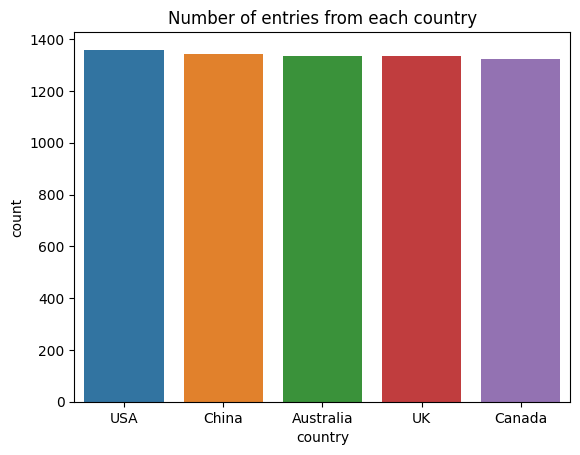

In [52]:
sns.barplot(country_,x='country',y='count',hue='country', dodge=False)
# fig = px.bar(country_,x='country',y='count',color='country')
plt.title("Number of entries from each country")

# Number of people form different races

In [53]:
Race_ = df['Race'].value_counts().reset_index()
Race_.columns = ['race','count']
Race_

,race,count
0,White,1962
1,Asian,1603
2,Korean,457
3,Australian,452
4,Chinese,444
5,Black,437
6,African American,354
7,Mixed,334
8,Welsh,333
9,Hispanic,322


Text(0.5, 1.0, 'Number of people from different races')

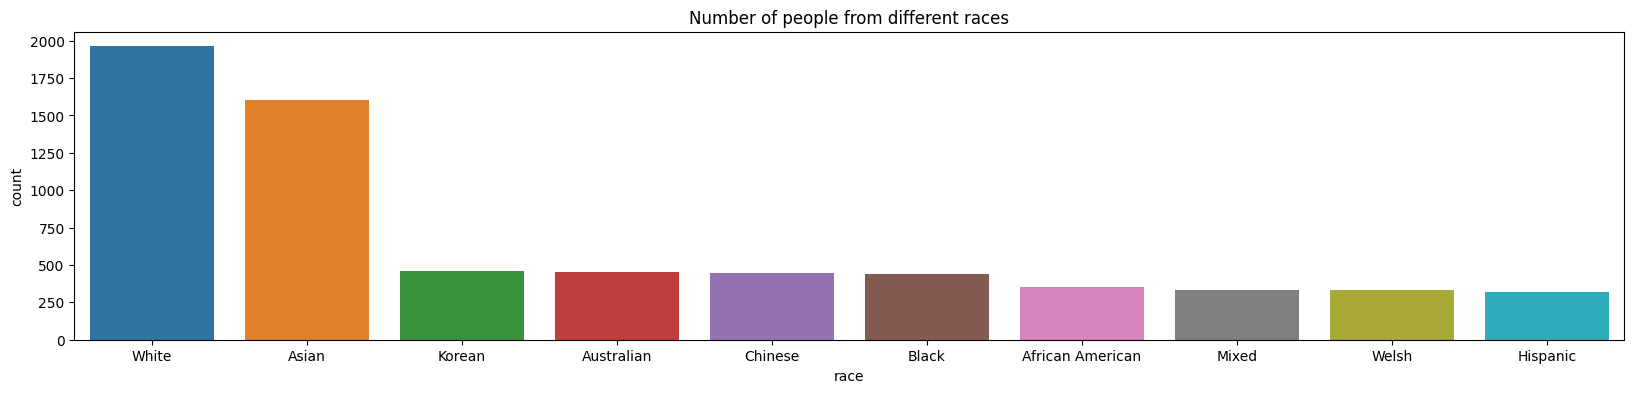

In [54]:
plt.figure(figsize=(20,4))
sns.barplot(Race_,x='race',y='count',hue='race',dodge=False)
plt.title("Number of people from different races")

### We can see here most of the  people from White race and Asian race   

# Analyzing Relationship between salary and their education level

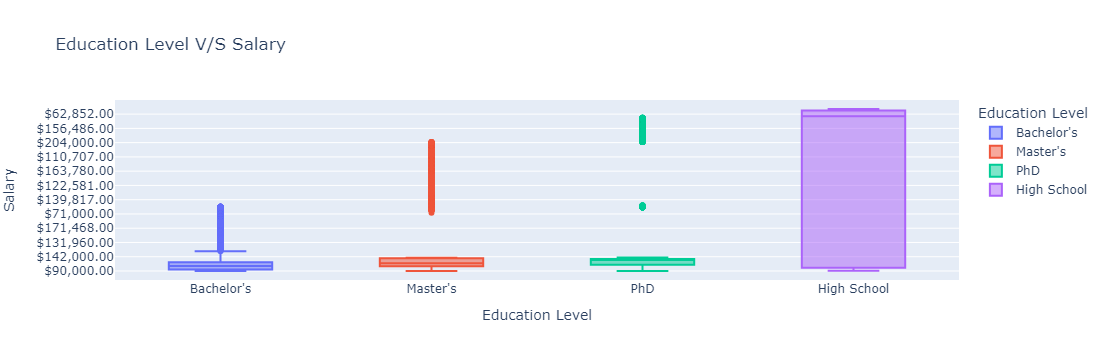

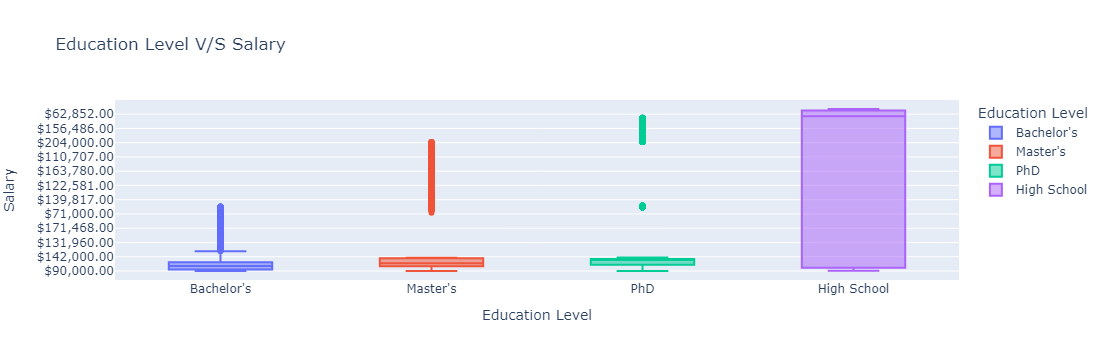

<Figure size 1000x600 with 0 Axes>

In [103]:
plt.figure(figsize=(10,6))
fig = px.box(df, x="Education Level", y="Salary", title='Education Level V/S Salary',color='Education Level')
fig.show()
img = Image.open('images/newplot.png')
display(img)